In [1]:
import numpy as np
import seaborn as sns

from numba import jit
from tqdm import tqdm

## Problematik

Kollege spielt Legends of Runeterra.<br>
Er hat im Spiel 40 Karten, von welchen er immer 1 zufällig zieht.<br>
Er hat 6 Karten, welche er gerne ziehen will.

Nach 20 Zügen hat er aber noch keine von den 6 gewünschten Karten gezogen.<br>
Er wundert sich, ob das überhaupt realistisch ist...<br>
Berechne die Wahrscheinlichkeit, dass er nach 20 Zügen keine der 6 Karten gezogen hat.

## Lösungsverfahren: Monte Carlo Simulation

Monte Carlo with jit

In [2]:
@jit
def carlo(total = 1_000_000):
    count = 0
    for _ in range(total):
        temp = np.random.randint(low = 1, high = 40 + 1, size = 20)
        
        if not np.any(temp < 7):
            count += 1

    return np.round(count/total, 5)

Calculate probability using 100M simulations

In [3]:
carlo(100_000_000)

0.03876

Looking at distributions of simulations

In [4]:
vals = []
for i in tqdm(range(10_000)):
    vals.append(carlo(10_000))

100%|██████████| 10000/10000 [00:38<00:00, 261.91it/s]


<AxesSubplot:ylabel='Density'>

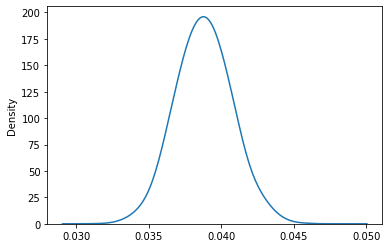

In [5]:
sns.kdeplot(vals, bw_adjust=2)

## Lösungsverfahren: Stochastik

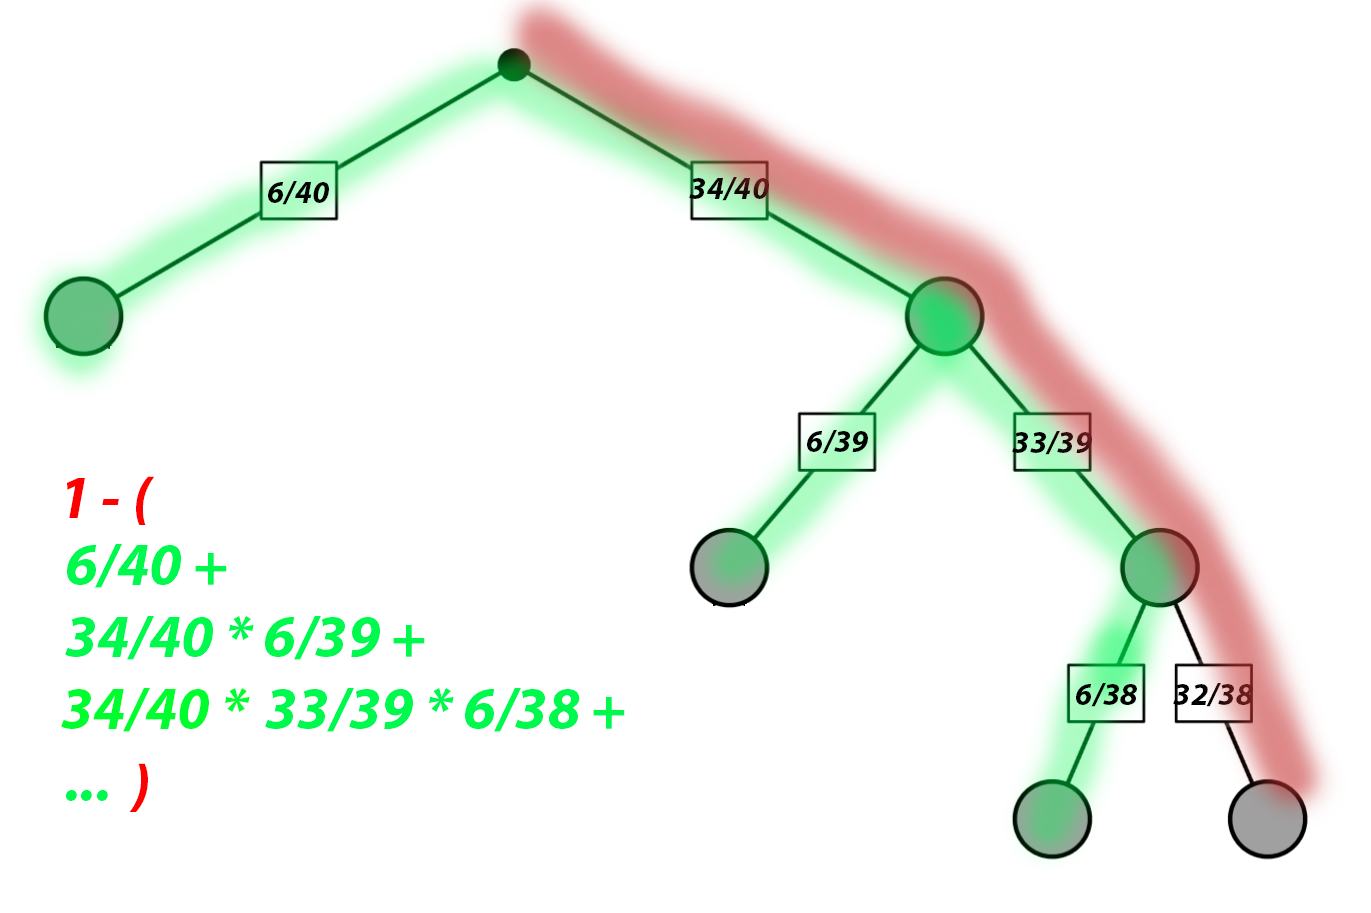

(oder einfach nur das Gegenteil -> 34/40 * 33/39 * ... * 15/21)

In [6]:
prob = 1
for i in range(40, 5, -1):
    prob *= (i - 6)/i
    print(f'''Karte gezogen:
{i - 1} verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = {(prob)*100}%
''')

Karte gezogen:
39 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 85.0%

Karte gezogen:
38 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 71.92307692307692%

Karte gezogen:
37 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 60.5668016194332%

Karte gezogen:
36 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 50.74515811357917%

Karte gezogen:
35 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 42.28763176131597%

Karte gezogen:
34 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 35.038323459376095%

Karte gezogen:
33 verbleibende Karten. 
Wahrscheinlichkeit, dass bis jetzt noch keine 
der gewünschten Karten gezogen wurde = 28.85508990

Lösung bei 20 Karten: 1.0098%